[*********************100%***********************]  10 of 10 completed


                Close
Date                 
2019-01-02  37.667175
2019-01-03  33.915253
2019-01-04  35.363083
2019-01-07  35.284359
2019-01-08  35.956993
                  Close
Date                   
2019-01-02  6665.939941
2019-01-03  6463.500000
2019-01-04  6738.859863
2019-01-07  6823.470215
2019-01-08  6897.000000


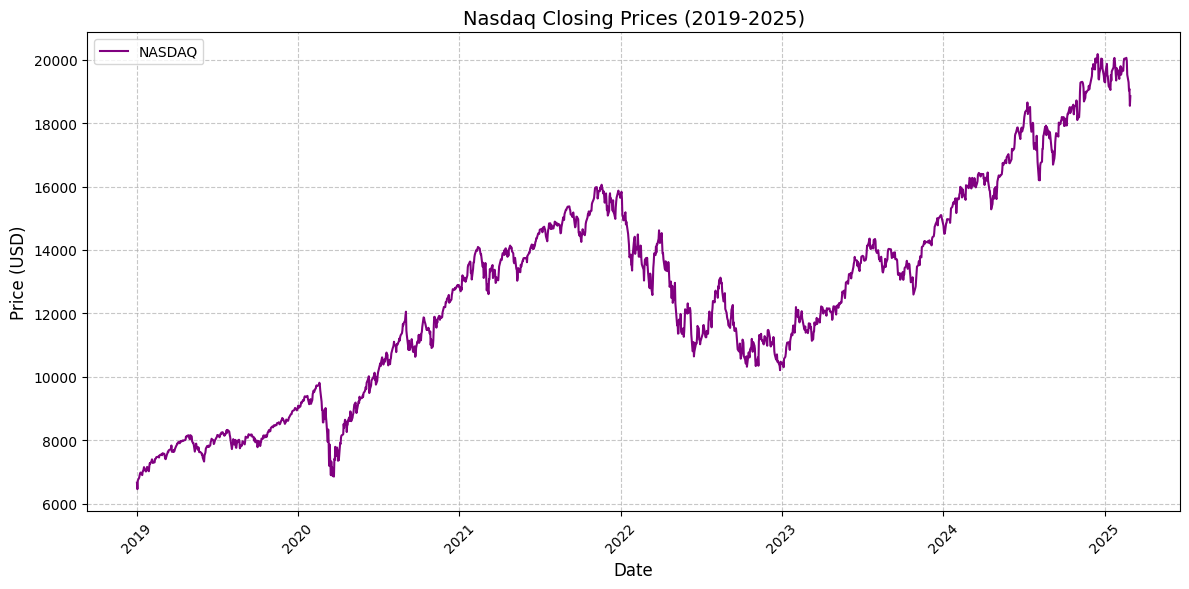

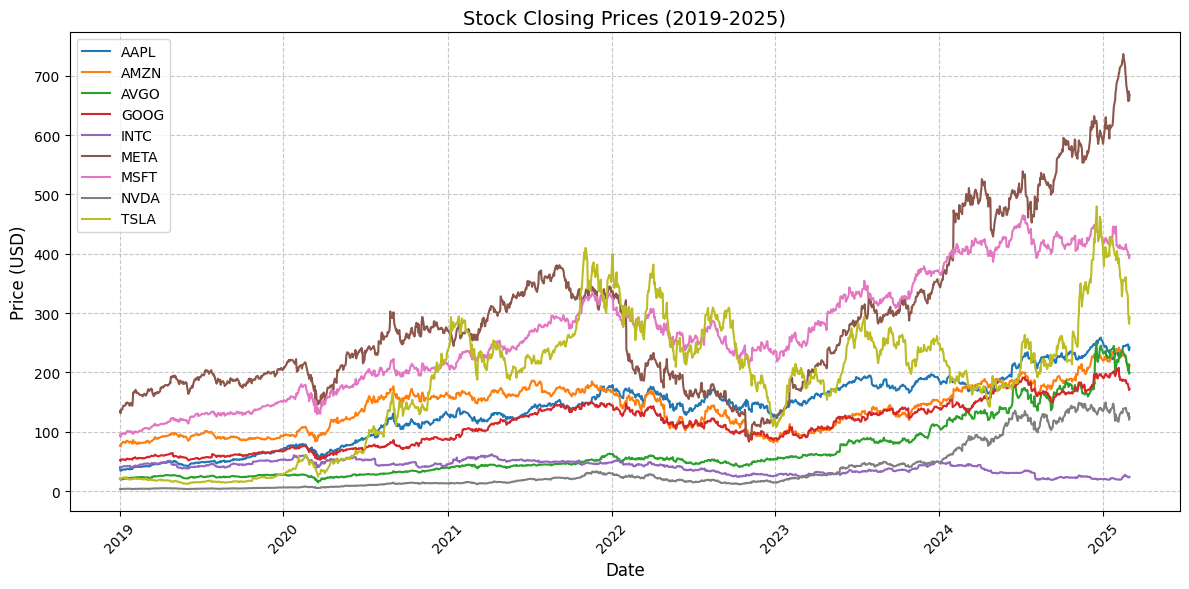

Stock data has been saved to 'stock_prices_2019_2025.xlsx'


In [357]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of stocks and Nasdaq index
stocks = ['AAPL', 'AMZN', 'AVGO', 'GOOG', 'INTC', 'META', 'MSFT', 'NVDA', 'TSLA', '^IXIC']
start_date = '2019-01-01'
end_date = '2025-03-01'

# Fetch all data at once (including Nasdaq)
data = yf.download(stocks, start=start_date, end=end_date, interval='1d')

# Create a dictionary of DataFrames for individual stocks/index
close_dfs = {stock: pd.DataFrame(data['Close'][stock]).rename(columns={stock: 'Close'}) 
            for stock in stocks}

# Display one to verify
print(close_dfs['AAPL'].head())
print(close_dfs['^IXIC'].head())  # Verify Nasdaq data

# Plot 1: Only Nasdaq
plt.figure(figsize=(12, 6))
plt.plot(close_dfs['^IXIC'].index, close_dfs['^IXIC']['Close'], label='NASDAQ', color='purple')
plt.title('Nasdaq Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: All stocks except Nasdaq
stock_list = [stock for stock in stocks if stock != '^IXIC']  # Exclude Nasdaq
plt.figure(figsize=(12, 6))
for stock in stock_list:
    plt.plot(close_dfs[stock].index, close_dfs[stock]['Close'], label=stock)
plt.title('Stock Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combine all closing prices into one DataFrame
all_close = data['Close'].rename(columns={'^IXIC': 'NASDAQ'})  # Rename ^IXIC to NASDAQ for clarity

# Define the Excel file name
excel_file = 'stock_prices_2019_2025.xlsx'

# Save to Excel in a single sheet
with pd.ExcelWriter(excel_file, engine='xlsxwriter', date_format='yyyy-mm-dd') as writer:
    # Format the index (dates) to 'YYYY-MM-DD' before saving
    all_close.index = all_close.index.strftime('%Y-%m-%d')
    
    # Write all data to a single sheet
    all_close.to_excel(writer, sheet_name='Stock_Data', index=True)
    
    # Get the worksheet
    worksheet = writer.sheets['Stock_Data']
    
    # Set column widths
    worksheet.set_column('A:A', 15)  # Date column
    worksheet.set_column('B:K', 15)  # Stock and Nasdaq price columns (10 columns total)
    
    # Add header format
    header_format = writer.book.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#D7E4BC',
        'border': 1
    })
    
    # Apply header format to first row
    worksheet.write('A1', 'Date', header_format)
    for col_num, value in enumerate(all_close.columns.values):
        worksheet.write(0, col_num + 1, value, header_format)

# Print confirmation
print(f"Stock data has been saved to '{excel_file}'")

In [358]:
all_close

Ticker,AAPL,AMZN,AVGO,GOOG,INTC,META,MSFT,NVDA,TSLA,NASDAQ
Date,,,,,,,,,,
2019-01-02,37.667175,76.956497,21.193178,52.105282,40.518047,135.163651,95.119812,3.378090,20.674667,6665.939941
2019-01-03,33.915253,75.014000,19.308022,50.621113,38.289032,131.238678,91.620552,3.173995,20.024000,6463.500000
2019-01-04,35.363083,78.769501,19.497786,53.343830,40.638535,137.425049,95.881760,3.377346,21.179333,6738.859863
2019-01-07,35.284359,81.475502,19.894882,53.228245,40.827862,137.524658,96.004059,3.556145,22.330667,6823.470215
2019-01-08,35.956993,82.829002,19.735210,53.621330,41.086063,141.987625,96.700134,3.467613,22.356667,6897.000000
...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,212.710007,207.929993,181.190002,24.270000,668.130005,404.000000,130.279999,330.529999,19286.929688
2025-02-25,247.039993,212.800003,202.539993,177.369995,22.990000,657.500000,397.899994,126.629997,302.799988,19026.390625
2025-02-26,240.360001,214.350006,212.940002,174.699997,23.520000,673.700012,399.730011,131.279999,290.799988,19075.259766


In [359]:
senti = pd.read_csv('financial_sentiment_results_v1.csv')
senti = senti.sort_values(by=['date', 'positive_ratio'], ascending=[True, True])
senti['date'] = pd.to_datetime(senti['date'], format='%Y_%m_%d').dt.date
senti['year'] = pd.to_datetime(senti['date'], format='%Y_%m_%d').dt.year

In [ ]:
senti['positive_diff'] = senti.groupby('stock')['positive'].diff()
senti['negative_diff'] = senti.groupby('stock')['negative'].diff()
senti['neutral_diff'] = senti.groupby('stock')['neutral'].diff()
senti['positive_ratio_diff'] = senti.groupby('stock')['positive_ratio'].diff()
senti['negative_ratio_diff'] = senti.groupby('stock')['negative_ratio'].diff()
senti['neutral_ratio_diff'] = senti.groupby('stock')['neutral_ratio'].diff()
senti = senti.sort_values(['stock', 'year'])
senti = senti.dropna()
senti.head()


,stock,cik,date,positive,negative,neutral,positive_ratio,negative_ratio,neutral_ratio,year,positive_diff,negative_diff,neutral_diff,positive_ratio_diff,negative_ratio_diff,neutral_ratio_diff
1,AAPL,320193,2020-09-26,19.4815,43.3441,4.1744,29.08,64.69,6.23,2020,1.4228,0.1494,0.4278,1.30,-1.76,0.47
2,AAPL,320193,2021-09-25,20.9849,34.4208,5.5943,34.40,56.43,9.17,2021,1.5034,-8.9233,1.4199,5.32,-8.26,2.94
3,AAPL,320193,2022-09-24,21.4173,33.6360,3.9467,36.30,57.01,6.69,2022,0.4324,-0.7848,-1.6476,1.90,0.58,-2.48
4,AAPL,320193,2023-09-30,22.0235,30.8923,2.0841,40.04,56.17,3.79,2023,0.6062,-2.7437,-1.8626,3.74,-0.84,-2.90
5,AAPL,320193,2024-09-28,21.5130,31.3597,3.1274,38.42,56.00,5.58,2024,-0.5105,0.4674,1.0433,-1.62,-0.17,1.79


In [361]:
def calculate_returns(df, stock_ticker, start_date='2019-01-01', hold_period_days=2192):
    start_date = pd.to_datetime(start_date)
    end_date = start_date + pd.Timedelta(days=hold_period_days)

    # Ensure the dataframe index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    # If end_date is not in df, increment the end_date until we find a trading day
    if start_date not in df.index:
        print(f"start date {start_date} is not a trading day. Searching for the next available trading day.")
        # Keep incrementing the end_date by one day until we find a trading day in the df_period
        while start_date not in df.index:
            # Keep incrementing the end_date by one day until we find a trading day in the df_period
            start_date += pd.Timedelta(days=1)  # Increment the end_date by one day

        print(f"Found next trading day: {start_date}")  # Increment the end_date by one day
        

    if end_date not in df.index:
        print(f"End date {end_date} is not a trading day. Searching for the next available trading day.")
        
        # Keep incrementing the end_date by one day until we find a trading day in the df_period
        while end_date not in df.index:
            end_date += pd.Timedelta(days=1)  # Increment the end_date by one day
        
        print(f"Found next trading day: {end_date}")
    
    # Get the price on the adjusted end_date (whether it's the original or the next available one)
    start_price = df.loc[start_date, stock_ticker]
    end_price = df.loc[end_date, stock_ticker]  # Price on the adjusted end date
    
    # Buy and hold return
    buy_hold_return = ((end_price / start_price) - 1)
    
    # Calculate the time in years
    #days = (end_date - start_date).days
    #years = days / 365.0

    # Annualized return calculation
    #annualized_return = ((end_price / start_price) ** (1 / years) - 1)
    
    # Return both buy_hold_return and annualized_return
    results = buy_hold_return.round(4)  # Rounded to 4 decimal places
    return results


In [ ]:
returns = []
for year, group in senti.groupby('year'):
    group = group.sort_values(by='positive_ratio_diff', ascending=False)
    
    # seperate to high-change group and low-change group
    mid_index = len(group) // 2
    high_group = group.iloc[:mid_index]
    low_group = group.iloc[mid_index:]
    
    # avg return of high-change group
    high_returns = []
    for index, row in high_group.iterrows():
        return_value = calculate_returns(all_close, row['stock'], start_date=row['date'], hold_period_days=6)
        high_returns.append(return_value)
    
    # avg return of low-change group
    low_returns = []
    for index, row in low_group.iterrows():
        return_value = calculate_returns(all_close, row['stock'], start_date=row['date'], hold_period_days=6)
        low_returns.append(return_value)
    
     # record the results
    returns.append({
        'year': year,
        'high_avg_return': np.mean(high_returns),
        'low_avg_return': np.mean(low_returns)
    })



start date 2019-12-28 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2019-12-30 00:00:00
start date 2020-12-26 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-12-28 00:00:00
End date 2021-01-01 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
start date 2020-09-26 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-09-28 00:00:00
start date 2020-11-01 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-11-02 00:00:00
End date 2020-11-07 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-11-09 00:00:00
start date 2020-01-26 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-01-27 00:00:00
End

In [ ]:
# change to dataframe
returns_df = pd.DataFrame(returns)
returns_df['spread'] = returns_df['high_avg_return']- returns_df['low_avg_return']
print(returns_df)

   year  high_avg_return  low_avg_return    spread
0  2019         0.025450        0.048333 -0.022883
1  2020        -0.001825        0.027980 -0.029805
2  2021         0.009925        0.006640  0.003285
3  2022         0.035350       -0.003760  0.039110
4  2023         0.017750        0.017260  0.000490
5  2024         0.049533        0.037125  0.012408


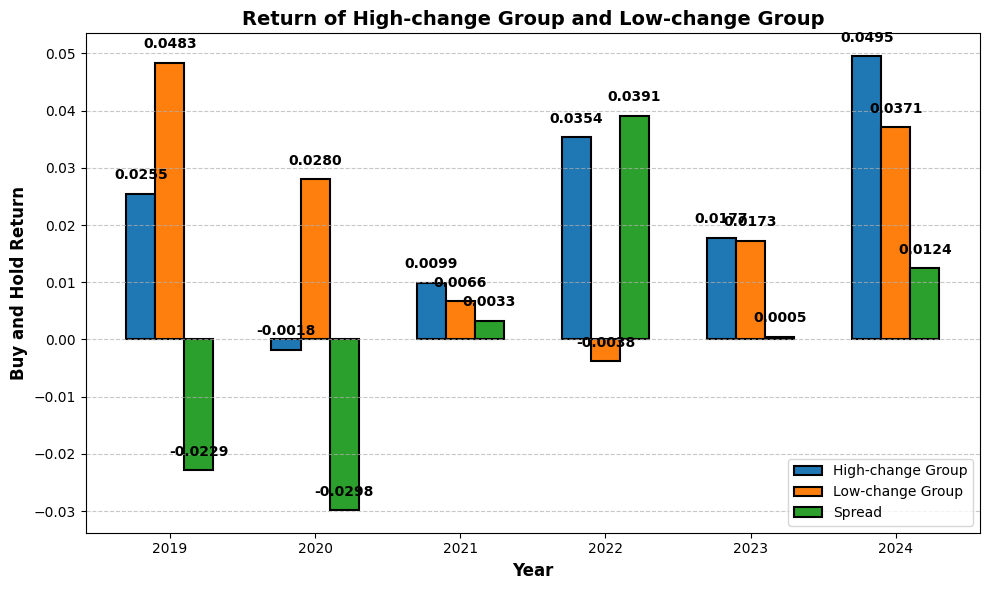

In [370]:
# Set the position of the bars on the x-axis
x = np.arange(len(returns_df['year']))  # Positions of the years on the x-axis
width = 0.2  # Width of each bar

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot different data columns with custom colors and edges
bars1 = ax.bar(x - width, returns_df['high_avg_return'], width, label='High-change Group', color='#1f77b4', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, returns_df['low_avg_return'], width, label='Low-change Group', color='#ff7f0e', edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, returns_df['spread'], width, label='Spread', color='#2ca02c', edgecolor='black', linewidth=1.5)

# Add data labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.002, f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Add labels and title with improved font styling
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Buy and Hold Return', fontsize=12, fontweight='bold')
ax.set_title('Return of High-change Group and Low-change Group', fontsize=14, fontweight='bold')

# Improve the x-ticks
ax.set_xticks(x)
ax.set_xticklabels(returns_df['year'], fontsize=10, fontweight='light')

# Add gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add the legend with a more appealing position
ax.legend(loc='lower right', fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()